In [118]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.optimizers import Adam
from keras.applications import VGG19
from itertools import combinations
import numpy as np
import random
import matplotlib.pyplot as plt



In [119]:


# Instantiate the VGG-19 model
vgg19_model = VGG19(weights='imagenet',  # Use pre-trained weights trained on ImageNet
                    include_top=True,    # Include the fully connected layers at the top
                    input_shape=(224, 224, 3))  # Specify the input shape

# Summary of the VGG-19 model architecture
#vgg19_model.summary()




In [120]:
def load_images_and_labels(base_dirs, target_size=(128, 128)):
    image_pairs = []
    for base_dir in base_dirs:
        if os.path.isdir(base_dir):
            folder_name = os.path.basename(base_dir)
            for file_name in sorted(os.listdir(base_dir)):
                file_path = os.path.join(base_dir, file_name)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = image.load_img(file_path, target_size=target_size)
                    img_array = image.img_to_array(img)
                    image_pairs.append((file_path, folder_name))
        else:
            print(f"Not a directory: {base_dir}")

    if not image_pairs:
        print("No images found after processing.")
    else:
        print(f"Loaded {len(image_pairs)} image pairs successfully.")

    df = pd.DataFrame(image_pairs, columns=['Image_Array', 'Folder_Name'])
    for index, row in df.iterrows():
        image_paths = row['Image_Array']
        #print("Image 1:", image_paths[0])  # Print the path of the first image
        #print("Image 2:", image_paths[1])  # Print the path of the second image
        #print("Folder Name:", row['Folder_Name'])  # Print the folder name
        #print()

    return df

# Example usage:
folder_paths = [
    "Train/Train/Case",
    "Train/Train/HoMuseum",
    "Train/Train/HoEntrance",
    "Train/Train/McgregoryLounge",
    "Train/Train/Lab",
    "Train/Train/Truck",
    "Train/Train/multi-temporal-temple-baalshamin",
    "Train/Train/pond",
    "Train/Train/transp_obj_glass_cup",
    "Train/Train/transp_obj_glass_cylinder",
    "Train/Train/church",
    "Train/Train/dioscuri",
    "Train/Train/lizard",
    "Test/Test/church",
    "Test/Test/lizard",
    "Test/Test/Case",
    "Test/Test/HoMuseum",
    "Test/Test/HoEntrance",
    "Test/Test/McgregoryLounge",
    "Test/Test/Lab",
    "Test/Test/Truck"
]

df = load_images_and_labels(folder_paths)

# Assign labels based on whether images are from the same folder
df['Label'] = (df.groupby('Folder_Name').cumcount() % 2).astype(bool)

# Split into X (input arrays) and y (labels)
X = np.array(df['Image_Array'].tolist())
y = df['Label'].values

# Display the DataFrame
#print(df.head(n=50))


Loaded 177 image pairs successfully.
Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: r
Folder Name: Case

Image 1: T
Image 2: 

In [121]:
def load_image_pairs(base_dirs, target_size=(128, 128)):
    positive_pairs = []
    negative_pairs = []
    images_dict = {}

    # Load images from directories
    for base_dir in base_dirs:
        images_dict[base_dir] = []
        if os.path.isdir(base_dir):
            for file_name in sorted(os.listdir(base_dir)):
                file_path = os.path.join(base_dir, file_name)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        img = image.load_img(file_path, target_size=target_size)
                        img_array = image.img_to_array(img)
                        images_dict[base_dir].append(img_array)
                    except UnidentifiedImageError as e:
                        print(f"Error loading image: {file_path}")
                        print(e)
        else:
            print(f"Not a directory: {base_dir}")

    # Create positive pairs from all possible combinations within each directory
    for images in images_dict.values():
        for img1, img2 in combinations(images, 2):
            positive_pairs.append((img1, img2, 1))

    # Create negative pairs by randomly picking from different directories
    base_dir_list = list(images_dict.keys())
    possible_negative_pairs = [(dir1, dir2) for dir1 in base_dir_list for dir2 in base_dir_list if dir1 != dir2]
    while len(negative_pairs) < len(positive_pairs):
        dir1, dir2 = random.choice(possible_negative_pairs)
        if images_dict[dir1] and images_dict[dir2]:  # Ensure non-empty directories
            img1 = random.choice(images_dict[dir1])
            img2 = random.choice(images_dict[dir2])
            negative_pairs.append((img1, img2, 0))

    # Combine and shuffle pairs
    pairs = positive_pairs + negative_pairs
    random.shuffle(pairs)
    images1 = []
    images2 = []
    labels = []

    for img1, img2, label in pairs:
        images1.append(img1)
        images2.append(img2)
        labels.append(label)

    # Convert lists to numpy arrays
    images1 = np.array(images1)
    images2 = np.array(images2)
    labels = np.array(labels)
    #print([images1, images2], labels)

    return [images1, images2], labels


folder_paths = [
    "Train/Train/Case",
    "Train/Train/HoMuseum",
    "Train/Train/HoEntrance",
    "Train/Train/McgregoryLounge",
    "Train/Train/Lab",
    "Train/Train/Truck",
    "Test/Test/Case",
    "Test/Test/HoMuseum",
    "Test/Test/HoEntrance",
    "Test/Test/McgregoryLounge",
    "Test/Test/Lab",
    "Test/Test/Truck"
]

load_image_pairs(folder_paths)

[array([[[[124., 108.,  92.],
         [132., 116., 100.],
         [129., 114.,  95.],
         ...,
         [233., 224., 219.],
         [232., 221., 217.],
         [228., 218., 216.]],

        [[127., 111.,  95.],
         [137., 121., 105.],
         [133., 117., 101.],
         ...,
         [232., 223., 218.],
         [229., 220., 215.],
         [226., 216., 214.]],

        [[117., 104.,  88.],
         [140., 124., 109.],
         [140., 124., 109.],
         ...,
         [227., 218., 213.],
         [221., 212., 207.],
         [217., 207., 205.]],

        ...,

        [[100.,  86.,  59.],
         [ 98.,  86.,  60.],
         [ 98.,  86.,  62.],
         ...,
         [ 34.,  25.,  18.],
         [ 28.,  19.,  12.],
         [ 27.,  18.,  13.]],

        [[100.,  86.,  59.],
         [ 98.,  86.,  60.],
         [ 98.,  86.,  62.],
         ...,
         [ 32.,  23.,  14.],
         [ 30.,  21.,  14.],
         [ 27.,  18.,  11.]],

        [[ 95.,  81.,  54.],
      

([array([[[[124., 108.,  92.],
           [132., 116., 100.],
           [129., 114.,  95.],
           ...,
           [233., 224., 219.],
           [232., 221., 217.],
           [228., 218., 216.]],
  
          [[127., 111.,  95.],
           [137., 121., 105.],
           [133., 117., 101.],
           ...,
           [232., 223., 218.],
           [229., 220., 215.],
           [226., 216., 214.]],
  
          [[117., 104.,  88.],
           [140., 124., 109.],
           [140., 124., 109.],
           ...,
           [227., 218., 213.],
           [221., 212., 207.],
           [217., 207., 205.]],
  
          ...,
  
          [[100.,  86.,  59.],
           [ 98.,  86.,  60.],
           [ 98.,  86.,  62.],
           ...,
           [ 34.,  25.,  18.],
           [ 28.,  19.,  12.],
           [ 27.,  18.,  13.]],
  
          [[100.,  86.,  59.],
           [ 98.,  86.,  60.],
           [ 98.,  86.,  62.],
           ...,
           [ 32.,  23.,  14.],
           [ 30., 

In [122]:
from keras.applications import VGG19
from keras.layers import Input, concatenate, Dense, Flatten
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split

def preprocess_images(image_paths, target_size=(128, 128)):
    X = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        X.append(img_array)
    return np.array(X)

if __name__ == '__main__':
    # Load VGG-19 model
    vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  
    
    filepath = "bestmodel.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    
    # Load the DataFrame
    # Replace 'Image_Path' with the actual column name containing the image paths in your DataFrame
    image_paths = df['Image_Array'].tolist()
    
    # Preprocess the images
    X = preprocess_images(image_paths)
    y = df['Label'].values
    
    # Split the data into training, validation, and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Define two input paths
    input1 = Input(shape=(128, 128, 3))
    input2 = Input(shape=(128, 128, 3))
    
    # Apply the VGG-19 model to each input separately
    output1 = vgg_model(input1)
    output2 = vgg_model(input2)
    
    # Flatten the outputs
    output1_flat = Flatten()(output1)
    output2_flat = Flatten()(output2)
    
    # Concatenate the flattened outputs
    concatenated = concatenate([output1_flat, output2_flat])
    
    # Add dense layers or other layers for classification (if needed)
    dense_layer = Dense(64, activation='relu')(concatenated)
    output_layer = Dense(1, activation='sigmoid')(dense_layer)
    
    # Create the final model
    final_model = Model(inputs=[input1, input2], outputs=output_layer)
    
    # Compile the model
    final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Start Fine-tuning
    batch_size = 3 
    nb_epoch = 10
    history = final_model.fit([X_train, X_train], y_train,  # Pass X_train twice since we have two inputs
                              batch_size=batch_size,
                              epochs=nb_epoch,
                              shuffle=True,
                              verbose=1,
                              validation_data=([X_val, X_val], y_val),  # Use validation data
                              callbacks=callbacks_list
                              )

    # Evaluate the model on the test set
    test_loss, test_accuracy = final_model.evaluate([X_test, X_test], y_test, verbose=0)
    print("Test Accuracy:", test_accuracy)


Epoch 1/10
38/38 [==============================] - 58s 1s/step - loss: 90.6228 - accuracy: 0.5089 - val_loss: 0.6705 - val_accuracy: 0.7586
Epoch 2/10
38/38 [==============================] - 66s 2s/step - loss: 0.7616 - accuracy: 0.4464 - val_loss: 1.0085 - val_accuracy: 0.3103
Epoch 3/10
38/38 [==============================] - 49s 1s/step - loss: 0.7627 - accuracy: 0.5446 - val_loss: 0.6571 - val_accuracy: 0.6897
Epoch 4/10
38/38 [==============================] - 53s 1s/step - loss: 0.7501 - accuracy: 0.5000 - val_loss: 0.6766 - val_accuracy: 0.6897
Epoch 5/10
38/38 [==============================] - 52s 1s/step - loss: 0.6916 - accuracy: 0.5357 - val_loss: 0.8900 - val_accuracy: 0.3103
Epoch 6/10
38/38 [==============================] - 50s 1s/step - loss: 0.7080 - accuracy: 0.4821 - val_loss: 0.7372 - val_accuracy: 0.3103
Epoch 7/10
38/38 [==============================] - 54s 1s/step - loss: 0.6966 - accuracy: 0.4821 - val_loss: 0.7127 - val_accuracy: 0.3103
Epoch 8/10
38/38 [=

1/1 [==============================] - 1s 668ms/step
[[0.5377611]]
Selected image 1: [[[[0.54901963 0.5294118  0.45490196]
   [0.5529412  0.53333336 0.45882353]
   [0.5372549  0.5176471  0.44313726]
   ...
   [0.45882353 0.39607844 0.3372549 ]
   [0.4745098  0.40392157 0.35686275]
   [0.42352942 0.3529412  0.30588236]]

  [[0.5294118  0.50980395 0.43529412]
   [0.5411765  0.52156866 0.44705883]
   [0.5411765  0.5137255  0.44313726]
   ...
   [0.4392157  0.3764706  0.31764707]
   [0.43529412 0.37254903 0.3137255 ]
   [0.39607844 0.33333334 0.27450982]]

  [[0.5137255  0.49411765 0.41960785]
   [0.5372549  0.5176471  0.44313726]
   [0.5294118  0.5019608  0.43137255]
   ...
   [0.44313726 0.38039216 0.32941177]
   [0.44705883 0.38431373 0.33333334]
   [0.40392157 0.34117648 0.28235295]]

  ...

  [[0.77254903 0.72156864 0.64705884]
   [0.7529412  0.7019608  0.627451  ]
   [0.7647059  0.7137255  0.6392157 ]
   ...
   [0.3137255  0.29411766 0.2784314 ]
   [0.21568628 0.20392157 0.18431373]


NameError: name 'image_names' is not defined

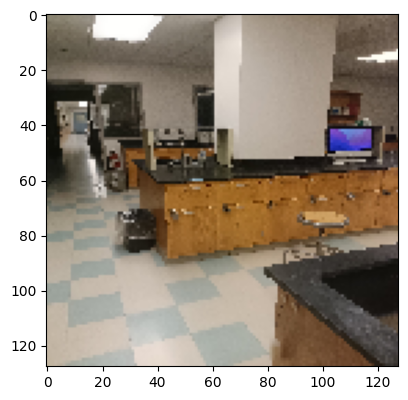

In [123]:
def compare_two_images(image_path1, image_path2, model, target_size=(128, 128)):
    # Load and preprocess the first image
    img1 = image.load_img(image_path1, target_size=target_size)
    img1_array = image.img_to_array(img1)
    img1_processed = np.expand_dims(img1_array, axis=0) / 255.0  # Normalize

    # Load and preprocess the second image
    img2 = image.load_img(image_path2, target_size=target_size)
    img2_array = image.img_to_array(img2)
    img2_processed = np.expand_dims(img2_array, axis=0) / 255.0  # Normalize

    prediction = model.predict([img1_processed, img2_processed])
    same_scene = prediction > 0.5  # Assuming the model outputs a sigmoid activation
    print(prediction)
    print("Selected image 1:", img1_processed)
    print("Selected image 2:", img2_processed)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title('Image 1: ' + image_names[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title('Image 2: ' + image_names[1])
    plt.axis('off')

    plt.show()
    
    return same_scene.item() == 1



path = "Test\\Test\\Lab\\Copy2.jpg"
path2= "Test\\Test\\HoEntrance\\Copy1.jpg"
compare_two_images(path,path2,final_model,target_size=(128,128))




#path = "Test\\Test\\Lab\\Copy2.jpg"
#path2= "Test\\Test\\Lab\\Copy1.jpg"
#compare_two_images(path,path2,final_model,target_size=(128,128))


In [ ]:
ls